In [29]:
## IMPORTS
import pandas as pd
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
import datetime
from forex_python.converter import CurrencyRates
from pandas_profiling import ProfileReport

In [30]:
# %config InlineBackend.figure_format ='png'
%matplotlib inline
sns.set_style("whitegrid") 
sns.set_context("notebook" ,font_scale=0.57)


In [31]:
df = pd.read_csv('salary.csv')
df.head()


,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


# CLEAR DATA

In [32]:
df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [33]:
df  = df.dropna() 

In [34]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [35]:
df["currency"] = df["Salary"].str.slice(start=0, stop=1)

df["duration"] = df["Salary"].str.split("/", expand=True)[1]
df["sal"] = df["Salary"].str.split("/",expand=True)[0].str.slice(start=1).str.replace(",", '')
df["sal"] = df["sal"].apply(lambda row : ''.join(filter(str.isdigit , row)))

In [36]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,sal
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110


In [37]:
conversion_val = {
    '₹' : round(CurrencyRates().get_rate('INR', 'EUR'),4),
    '$' : round(CurrencyRates().get_rate('USD', 'EUR'),4), 
    '£'  : round(CurrencyRates().get_rate('GBP', 'EUR'),4),
    'A'  : 0.010 
    }

In [38]:
def convert_eur (sal, curr, conversion_val):
  
    sal_eur = conversion_val[curr] * int(sal)
    return sal_eur



# df["sal_eur"] = df[["sal", "currency"]].apply(lambda  : convert_eur(x["sal"], x["currency"], conversion_val))
df["sal_eur"] = df.apply(lambda row: convert_eur(row["sal"], row["currency"], conversion_val),axis = 1)

In [39]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,sal,sal_eur
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573,7782.876
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950,14303.400
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874,10042.488
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578,8034.936
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110,11329.320


In [40]:
#! Descomentar para gerar o report
# prof = ProfileReport(df)
# prof.to_file(output_file='report.html')

In [50]:
def year_sal(sal, dur): 
    pass
    if dur == 'yr' : return sal * 1
    if dur == 'mo' : return sal * 14
    if dur == 'hr' : return sal * 14 * 4.3 * 40

df["year_sal"] = df.apply(lambda row : year_sal(row["sal_eur"], row["duration"]),axis = 1)


In [55]:
df["Job Title"].value_counts()

Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

In [57]:
df[df['Job Title'].str.contains('Associate')]

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,sal,sal_eur,year_sal
1253,ZS Associates,Data Science Associate,9.0,Pune,"₹12,03,913/yr",₹,yr,1203913,14446.956,14446.956
4115,Amazon,Machine Learning Data Associate,38.0,Hyderabad,"₹2,75,841/yr",₹,yr,275841,3310.092,3310.092
4116,Amazon,Machine Learning Data Associate I,9.0,Hyderabad,"₹2,58,596/yr",₹,yr,258596,3103.152,3103.152
4117,Amazon,Machine Learning Associate,6.0,Hyderabad,"₹2,95,114/yr",₹,yr,295114,3541.368,3541.368
4118,Amazon,Machine Learning Data Associate II,5.0,Hyderabad,"₹3,83,213/yr",₹,yr,383213,4598.556,4598.556
4120,Techolution,Associate Machine Learning Engineer,3.0,Hyderabad,"₹4,64,372/yr",₹,yr,464372,5572.464,5572.464


In [72]:
def get_level(row, level_list):
    for level in level_list:
        if level in row:
            return level
    return 'Unknown'
            


level_list = {'Associate', 'Consultant', 'Manager', 'Senior', 'Junior', 'Trainee'}

df['level'] = df.apply(lambda row: get_level(row['Job Title'], level_list), axis=1)

# Income by position level

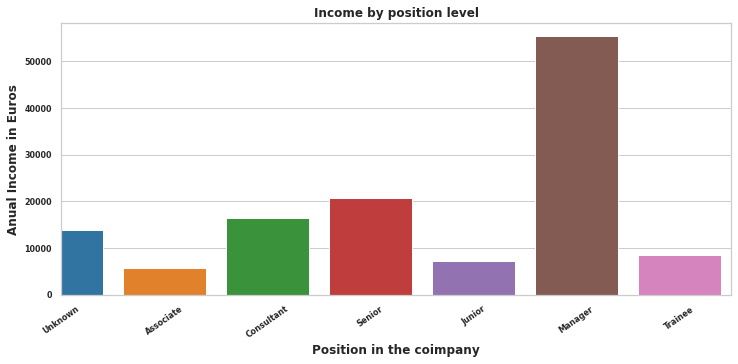

In [90]:
plt.figure(figsize = (12,5))

sns.barplot(x = 'level',  y="year_sal",  data = df, ci=None)

plt.title("Income by position level",  weight='bold' , fontsize=12)
plt.ylabel("Anual Income in Euros",  weight='bold' , fontsize=12)
plt.xlabel("Position in the coimpany",  weight='bold', fontsize=12 )
plt.xticks(rotation=35,  weight='bold', fontsize=8)
plt.yticks(weight='bold', fontsize=8)


plt.ylim(0)
plt.xlim(0)
plt.show()

# Top Companies average Salaries


In [117]:
def get_top_10(company, top_20):
    
    if company in top_20 : return company
    else : return "others"
    

top_20 = df['Company Name'].value_counts().head(20).index.tolist()




df["company"] = df.apply(lambda row : get_top_10(row["Company Name"], top_20), axis=1)

In [118]:
df["company"].value_counts()

others                            3906
Tata Consultancy Services           41
Amazon                              31
Accenture                           30
Google                              27
IBM                                 26
Fresher                             26
First Student                       25
Infosys                             23
DONE by NONE                        21
Cognizant Technology Solutions      21
ABC                                 20
Capgemini                           17
Wipro                               17
Microsoft                           17
LTI                                 16
Deloitte                            16
Tech Mahindra                       16
Nones                               15
HCL Technologies                    14
Quantiphi                           14
Name: company, dtype: int64

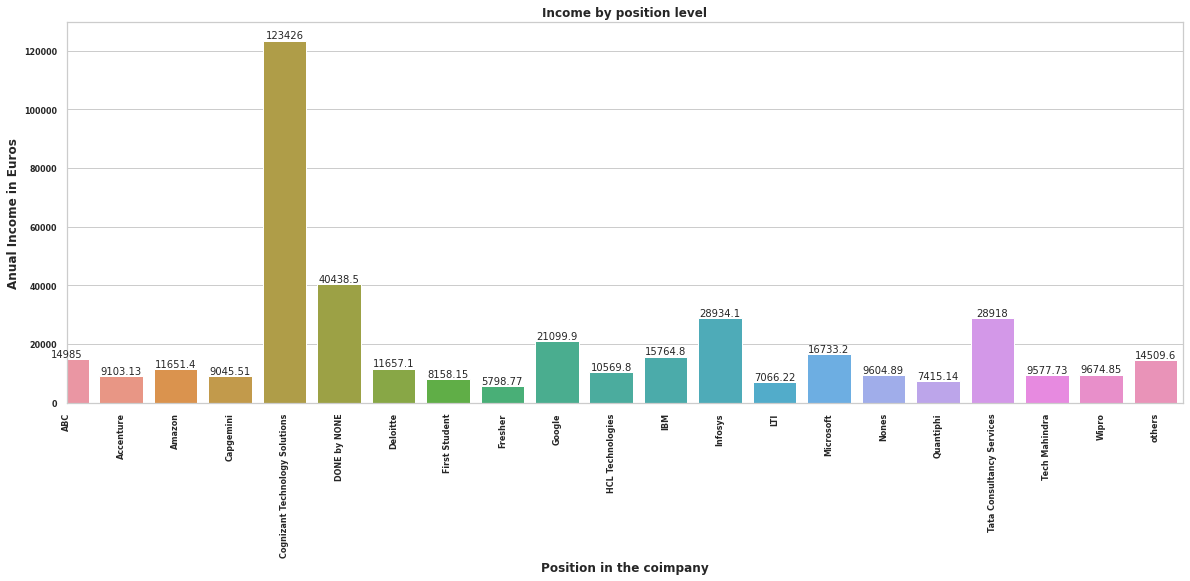

In [167]:
plt.figure(figsize = (20,7))


temp_df = df[["company", 'level', 'year_sal']].groupby(["company", 'level','year_sal']).mean()
temp_df = temp_df.reset_index()
temp_df



ax = sns.barplot(x = 'company',  y='year_sal', data = temp_df, ci=None)
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Income by position level",  weight='bold' , fontsize=12)
plt.ylabel("Anual Income in Euros",  weight='bold' , fontsize=12)
plt.xlabel("Position in the coimpany",  weight='bold', fontsize=12 )
plt.xticks(rotation=90,  weight='bold', fontsize=8)
plt.yticks(weight='bold', fontsize=8)


plt.ylim(0)
plt.xlim(0)
plt.show()

In [171]:

df[df["Company Name"]== 'Cognizant Technology Solutions']

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,sal,sal_eur,year_sal,level,company
7,Cognizant Technology Solutions,Data Scientist,26.0,Bangalore,"₹7,36,708/yr",₹,yr,736708,8840.496,8840.496,Unknown,Cognizant Technology Solutions
896,Cognizant Technology Solutions,Data Scientist,1.0,Bangalore,"₹4,33,436/yr",₹,yr,433436,5201.232,5201.232,Unknown,Cognizant Technology Solutions
991,Cognizant Technology Solutions,Data Scientist,8.0,Pune,"₹7,65,632/yr",₹,yr,765632,9187.584,9187.584,Unknown,Cognizant Technology Solutions
1376,Cognizant Technology Solutions,Data Scientist,8.0,Hyderabad,"₹8,90,344/yr",₹,yr,890344,10684.128,10684.128,Unknown,Cognizant Technology Solutions
1578,Cognizant Technology Solutions,Data Scientist,8.0,New Delhi,"₹9,65,789/yr",₹,yr,965789,11589.468,11589.468,Unknown,Cognizant Technology Solutions
1773,Cognizant Technology Solutions,Data Scientist,4.0,Mumbai,"₹8,30,959/yr",₹,yr,830959,9971.508,9971.508,Unknown,Cognizant Technology Solutions
1965,Cognizant Technology Solutions,Data Analyst,24.0,Bangalore,"₹5,80,641/yr",₹,yr,580641,6967.692,6967.692,Unknown,Cognizant Technology Solutions
2156,Cognizant Technology Solutions,Data Analyst,26.0,Pune,"₹5,37,527/yr",₹,yr,537527,6450.324,6450.324,Unknown,Cognizant Technology Solutions
2222,Cognizant Technology Solutions,Data Analyst,2.0,Pune,"₹8,623/mo",₹,mo,8623,103.476,1448.664,Unknown,Cognizant Technology Solutions
2358,Cognizant Technology Solutions,Data Analyst,22.0,Hyderabad,"₹5,27,930/yr",₹,yr,527930,6335.160,6335.160,Unknown,Cognizant Technology Solutions
